In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


Let's consider a simple dataset

In [2]:
age_data = pd.read_csv('datasets/age.csv',
                       sep=r'\s*,\s*', 
                       names=["Name","Age"],
                       skiprows=1,
                       engine='python')

In [3]:
age_data

,Name,Age
0,Michael,23
1,Steve,45
2,Ryan,64
3,Vedh,13
4,Stella,43
5,Chris,42
6,Robert,14
7,Louis,22
8,Stevenson,27
9,Adams,36


In [4]:
(np.mean(age_data.Age))

38.06666666666667

If you know the population mean of the data, you can calculate the T-statistic to determine whether the sample in question is drastically different from the average population

Lets assume different values for the population mean for the age (the reference value provided as the second argument in each test), to see how the T-statistic varies for each assumption.

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value

* t-score: Ratio between the difference between the two groups and the difference within the groups. Higher this ratio, greater the difference
* p-value: The probability that the results in your sample data occurred by chance - this is the alpha level in most cases an alpha value of 0.05 is good
* The degrees of freedom used in the T-test

In [5]:
A = stats.ttest_1samp(age_data.Age, 38.067)
A

Ttest_1sampResult(statistic=-8.379682782738356e-05, pvalue=0.9999343221487609)

In [6]:
B = stats.ttest_1samp(age_data.Age, 45)
B

Ttest_1sampResult(statistic=-1.7429740188260239, pvalue=0.10324876450520698)

In [7]:
C = stats.ttest_1samp(age_data.Age, 50)
C

Ttest_1sampResult(statistic=-2.999926436248638, pvalue=0.009552905551034795)

In [8]:
D = stats.ttest_1samp(age_data.Age, 36)
D

Ttest_1sampResult(statistic=0.5195403325346812, pvalue=0.611500165827717)

What are these reference values we have used in the four different tests? Lets see them as compared with the mean of the age samples.We have chosen reference values such such we have numbers on both sides of the mean.

Let's plot a grpah of the probability v/s the T-statistic for each of our reference values. 

In [9]:
n=[38.067,45,50,36]

x=[A[0],B[0],C[0],D[0]]
y=[A[1],B[1],C[1],D[1]]

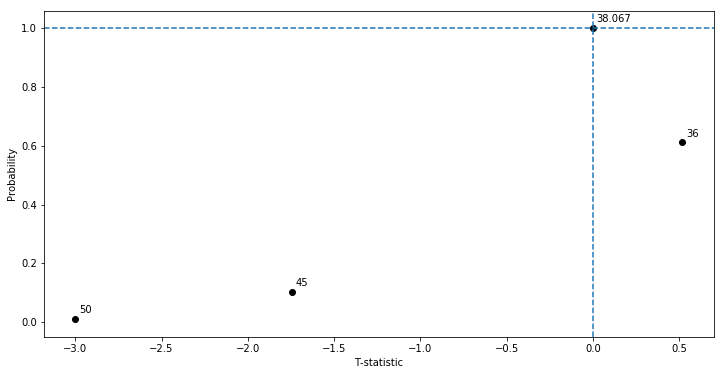

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, color='black')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i]+0.02, y[i]+0.02))
    
plt.xlabel('T-statistic')
plt.ylabel('Probability')

ax.axhline(y=1, 
           label="ideal_probability",
           linestyle='--')

ax.axvline(x=0.0, 
           label="ideal_probability",
           linestyle='--')

plt.show()

Ideally, the t-statistic should be 0 and p-value should be 1. The dotted lines show this ideal range. We see that for a reference value equal to the mea, the T-statistic and P-values are almost ideal and lie at the intersection of the lines.

We can observe that as the reference point moves away from the mean, 
* probability is decreasing
* T-statistic is increasing in magnitude. The sign depends on whether it is greater or lesser than the mean

Let's see what the t-statistic pattern looks like as we move away form the mean.

In [11]:
A=stats.ttest_1samp(age_data.Age, 25)
B=stats.ttest_1samp(age_data.Age, 30)
C=stats.ttest_1samp(age_data.Age, 33)
D=stats.ttest_1samp(age_data.Age, 35)
E=stats.ttest_1samp(age_data.Age, 36)
F=stats.ttest_1samp(age_data.Age, 37.4)
G=stats.ttest_1samp(age_data.Age, 37.9)
H=stats.ttest_1samp(age_data.Age, 38)
I=stats.ttest_1samp(age_data.Age, 38.04)
J=stats.ttest_1samp(age_data.Age, 38.067)
K=stats.ttest_1samp(age_data.Age, 38.1)
L=stats.ttest_1samp(age_data.Age, 38.2)
M=stats.ttest_1samp(age_data.Age, 39)
N=stats.ttest_1samp(age_data.Age, 40)
O=stats.ttest_1samp(age_data.Age, 43)
P=stats.ttest_1samp(age_data.Age, 45)
Q=stats.ttest_1samp(age_data.Age, 49)
R=stats.ttest_1samp(age_data.Age, 50)

In [12]:
x = [A[0],B[0],C[0],D[0],
     E[0],F[0],G[0],H[0],
     I[0],J[0],K[0],L[0],
     M[0],N[0],O[0],P[0],
     Q[0],R[0]]
y = [A[1],B[1],C[1],D[1],
     E[1],F[1],G[1],H[1],
     I[1],J[1],K[1],L[1],
     M[1],N[1],O[1],P[1],
     Q[1],R[1]]

In [13]:
from scipy.interpolate import interp1d

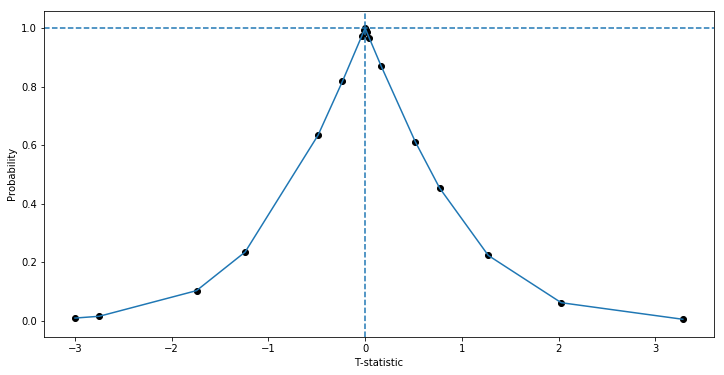

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

f = interp1d(x, y, kind='quadratic')
ax.scatter(x, y, color='black')
plt.plot (x,f(x))
    
plt.xlabel('T-statistic')
plt.ylabel('Probability')

ax.axhline(y=1, label="ideal_probability",linestyle='--')
ax.axvline(x=0.0, label="ideal_probability",linestyle='--')

plt.show()

What we see here is that the t-statistic gives us 
* the accuracy of the mean we have obtained compared to the reference value
* The t-statistic is negative if the reference value is higher and positive if reference value is lower
* P-value is 1 for max accuracy. It drops down drastically as the accuracy shifts and quickly goes down to zero as the values spread apart.

In real life, we will often deal with two samples, rather than a single sample and a reference value. The same principles can be extended, this time taking into account the means of the two samples.

#### independent t test
To compare the means of two samples, a two sample T-test is used.
Use one extra element in y2

In [15]:
y1 = [2,3,5,7,11]
y2 = [2,3,5,7,11,13]

stats.ttest_ind(y1, y2)

Ttest_indResult(statistic=-0.5022110332170285, pvalue=0.627575959366604)

#### y1 and y2 are the same

In [16]:
y1 = [2,3,5,7,11]
y2 = [2,3,5,7,11]

stats.ttest_ind(y1, y2)

Ttest_indResult(statistic=0.0, pvalue=1.0)

#### paired t test

Perhaps we want to compare two related samples, e.g. a before and after test, we might use a paired T-test. The samples should be similar - They should have the same length.

#### same elements, order changed

In [17]:
y1 = [2,3,5,7,11]
y2 = [11,7,5,3,2]

stats.ttest_rel(y1, y2)

Ttest_relResult(statistic=0.0, pvalue=1.0)

##### y1 and y2 are the same

In [18]:
y1 = [2,3,5,7,11]
y2 = [2,3,5,7,11]

stats.ttest_rel(y1, y2)

Ttest_relResult(statistic=nan, pvalue=nan)

#### some elements are common to y1 and y2

In [19]:
y1 = [2,3,5,7,11]
y2 = [1,2,3,4,5]

stats.ttest_rel(y1, y2)

Ttest_relResult(statistic=2.803652103289399, pvalue=0.048630233857306214)

#### Only one element in common

In [20]:
y1 = [2,3,5,7,11]
y2 = [3,3,3,3,3]

stats.ttest_rel(y1, y2)

Ttest_relResult(statistic=1.625, pvalue=0.17948771370061267)

#### No element in common

In [21]:
y1 = [2,3,5,7,11]
y2 = [6,8,9,10,12]

stats.ttest_rel(y1,y2)

Ttest_relResult(statistic=-5.013026509266502, pvalue=0.0074217887719942215)

We see that as more and more variation is introduced between our lists, the t-statistic value increases, p-value decreases. This is only for similar samples, and not for identical samples.

The obtained t-statistic value is used to calculate the p value. In general, if the p value is less than 0.05 or 0,01, we can reject the null hypothesis.

#### T-test for 3 samples

ANOVA is used to compare the means of three or more samples. An ANOVA will provide an F-statistic which can, along with degrees of freedom, be used to calculate a p value.

ANOVAs assume independence of observations, homogeneity of variances and normally distributed observations within groups.



In [22]:
y1 = [2,3,5,7,11]
y2 = [1,2,3,4,5]
y3 = [3,3,3,3,3]
y4 = [2,3,5,7,11,13]

stats.f_oneway(y1,y2,y3)

F_onewayResult(statistic=2.2091503267973853, pvalue=0.15244677832373454)

In [23]:
stats.f_oneway(y1, y2, y4)

F_onewayResult(statistic=1.6849820712929764, pvalue=0.22352266008801897)

In [24]:
stats.f_oneway(y1, y3, y4)

F_onewayResult(statistic=1.7988065750956992, pvalue=0.20433141514703082)

In [25]:
stats.f_oneway(y2, y3, y4)

F_onewayResult(statistic=3.352671606864274, pvalue=0.06696313337998357)

More the common elements amongst all three samples, higher is the probability value


## Salary example

In this example, we have data on salaries of employees in IT  based on their years of experience, their education level and whether or not they are management.

    Outcome: S, salaries for IT staff in a corporation.

    Predictors:
        X, experience (years)
        E, education (1=Bachelor’s, 2=Master’s, 3=Ph.D)
        M, management (1=management, 0=not management)



In [26]:
url = 'http://stats191.stanford.edu/data/salary.table'

salary_data = pd.read_table(url, 
                            sep='\t', 
                            engine='python')

In [27]:
salary_data

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0
5,20872,2,2,1
6,11772,2,2,0
7,10535,2,1,0
8,12195,2,3,0
9,12313,3,2,0


For this demo, we will consider the salary and experience aspects, and whether they belong to the management category. We will do away with the educational qualification for the purposes of this demo.

#### Salary based on role

Lets see what this data looks like. we plot a box plot of the salaries, classified by whether the professional is part of the management category or not.

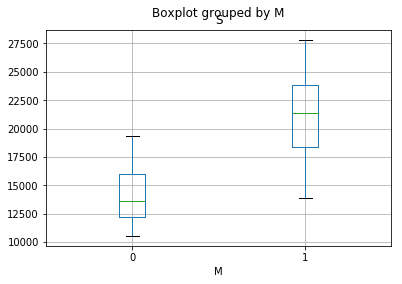

In [28]:
salary_data.boxplot(column=['S'], by='M')

plt.show()

shows that the average salary of those belonging to the managemant category is totally different from those who do not belong to the same. The range itself has a huge gap

In [29]:
management_no = salary_data[salary_data['M'] == 0]
management_yes = salary_data[salary_data['M'] == 1]

management_no

,S,X,E,M
1,11608,1,3,0
3,11283,1,2,0
4,11767,1,3,0
6,11772,2,2,0
7,10535,2,1,0
8,12195,2,3,0
9,12313,3,2,0
13,11417,4,1,0
15,13231,4,3,0
16,12884,4,2,0


In [30]:
stats.ttest_ind(management_yes['S'], 
                management_no['S'])

Ttest_indResult(statistic=7.075221612412384, pvalue=8.870138031217042e-09)

confirms our notion - the probability of professionals belonging to the management category and those not part of it do not draw similar salaries.

## PDI and sales

In [31]:
salary_data.describe()

,S,X,E,M
count,46.000000,46.000000,46.000000,46.000000
mean,17270.195652,7.500000,1.978261,0.434783
std,4716.631513,5.171503,0.774285,0.501206
min,10535.000000,1.000000,1.000000,0.000000
25%,13320.750000,3.000000,1.000000,0.000000
50%,16436.000000,6.000000,2.000000,0.000000
75%,20719.750000,11.000000,3.000000,1.000000
max,27837.000000,20.000000,3.000000,1.000000


We will classify this dataset based on experience.

In [32]:
low_exp = salary_data[salary_data['X'] < 6]
high_exp = salary_data[salary_data['X'] >= 6]

low_exp

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0
5,20872,2,2,1
6,11772,2,2,0
7,10535,2,1,0
8,12195,2,3,0
9,12313,3,2,0


#### In the case of the test scores effect we can reject the null hypotheses, the test is statistically significant

In [33]:
stats.ttest_ind(high_exp['S'], low_exp['S'])

Ttest_indResult(statistic=3.8744284801234032, pvalue=0.0003515996989646619)

Probability that professors with experience less than 6 yrs get the same salary as those above 6 is hardly possible.

In [34]:
stats.ttest_ind(high_exp['S'], high_exp['S'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

confirms our assumption that probability of something with itself is 1.